# DSA - FIAMED - MODULO 01 - Projeto Feedback

## Extração de Entidades e Relacionamentos de Dados Clínicos

## AutoNLP
- Autor: Rodrigo Lima
- LinkedIN: https://www.linkedin.com/in/rodrigolima82/

![title](https://uhs.berkeley.edu/sites/default/files/styles/panopoly_image_original/public/medicalrecords.png?itok=0lYt3FxX&timestamp=1540331323)

# Sobre o Dataset

O conjunto de dados que contém 3.984 sentenças médicas extraídas dos resumos do PubMed e as relações entre termos médicos distintos foram anotadas. Este conjunto de dados se concentra principalmente nas relações de "tratar" e "causar", com 1.043 sentenças contendo relações de tratamento e 1.787 contendo relações causais.

Os anotadores humanos receberam dois termos diferentes (como "Demência por corpos de Lewy" e "Alucinações visuais bem formadas") e foram solicitados a marcar a relação entre esses termos (neste caso, "Demência por corpos de Lewy causa Alucinações visuais formadas).

Essas sentenças médicas são ricas em informações e sua análise e classificação permite prever uma doença com base em sintomas (causas).

# Parte 1. Importando as bibliotecas do projeto

In [39]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

# Desativando warnings no jupyter
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 500
pd.options.display.max_columns = 500
pd.options.display.max_rows    = 500

# Parte 2. Importando os datasets

In [40]:
train = pd.read_csv("../data/train.csv")
val   = pd.read_csv("../data/validation.csv")
test  = pd.read_csv("../data/test.csv")

# Parte 3. Feature Engineering

In [41]:
# Removendo colunas
train = train[['relation','sentence']]
val   = val[['relation','sentence']]
test  = test[['relation','sentence']]

In [42]:
# Remove registros duplicados
train = train.drop_duplicates()
val   = val.drop_duplicates()
test   = test.drop_duplicates()

In [43]:
# Manter apenas as relacoes de causa e tratamento
relation = ['causes', 'treats'] 
train = train[train['relation'].isin(relation)] 
val   = val[val['relation'].isin(relation)] 
test  = test[test['relation'].isin(relation)] 

nRow, nCol = train.shape
print(f'Existem {nRow} linhas e {nCol} colunas em treino')

nRow, nCol = val.shape
print(f'Existem {nRow} linhas e {nCol} colunas em validacao')

nRow, nCol = test.shape
print(f'Existem {nRow} linhas e {nCol} colunas em teste')

Existem 1558 linhas e 2 colunas em treino
Existem 536 linhas e 2 colunas em validacao
Existem 533 linhas e 2 colunas em teste


In [44]:
train['relation'].value_counts()

causes    888
treats    670
Name: relation, dtype: int64

In [45]:
train.head()

,relation,sentence
0,treats,"For treatment of uncomplicated cervical, URETH..."
21,treats,SALMETEROL prevented EXERCISE INDUCED ASTHMA i...
28,causes,The patients showed the characteristic facies ...
35,treats,Dyskinesias occur in the majority of patients ...
42,causes,ENDOTOXEMIA was evoked by bolus injection of E...


# Parte 4. Treinamento Modelo usando Auto_NLP

In [52]:
from autoviml.Auto_NLP import Auto_NLP

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to


Imported Auto_NLP version: 0.0.44.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [53]:
# Definindo a coluna da sentença e target
nlp_column = 'sentence'
target = 'relation'

Auto NLP processing on NLP Column: sentence
Shape of Train Data: 1558 rows
    Shape of Test Data: 536 rows


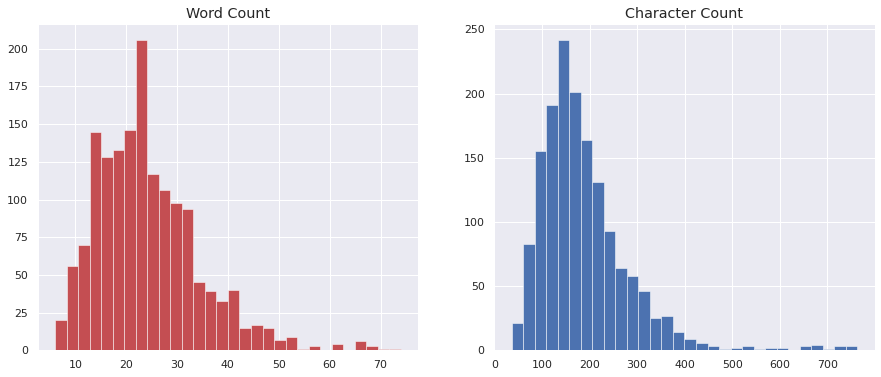

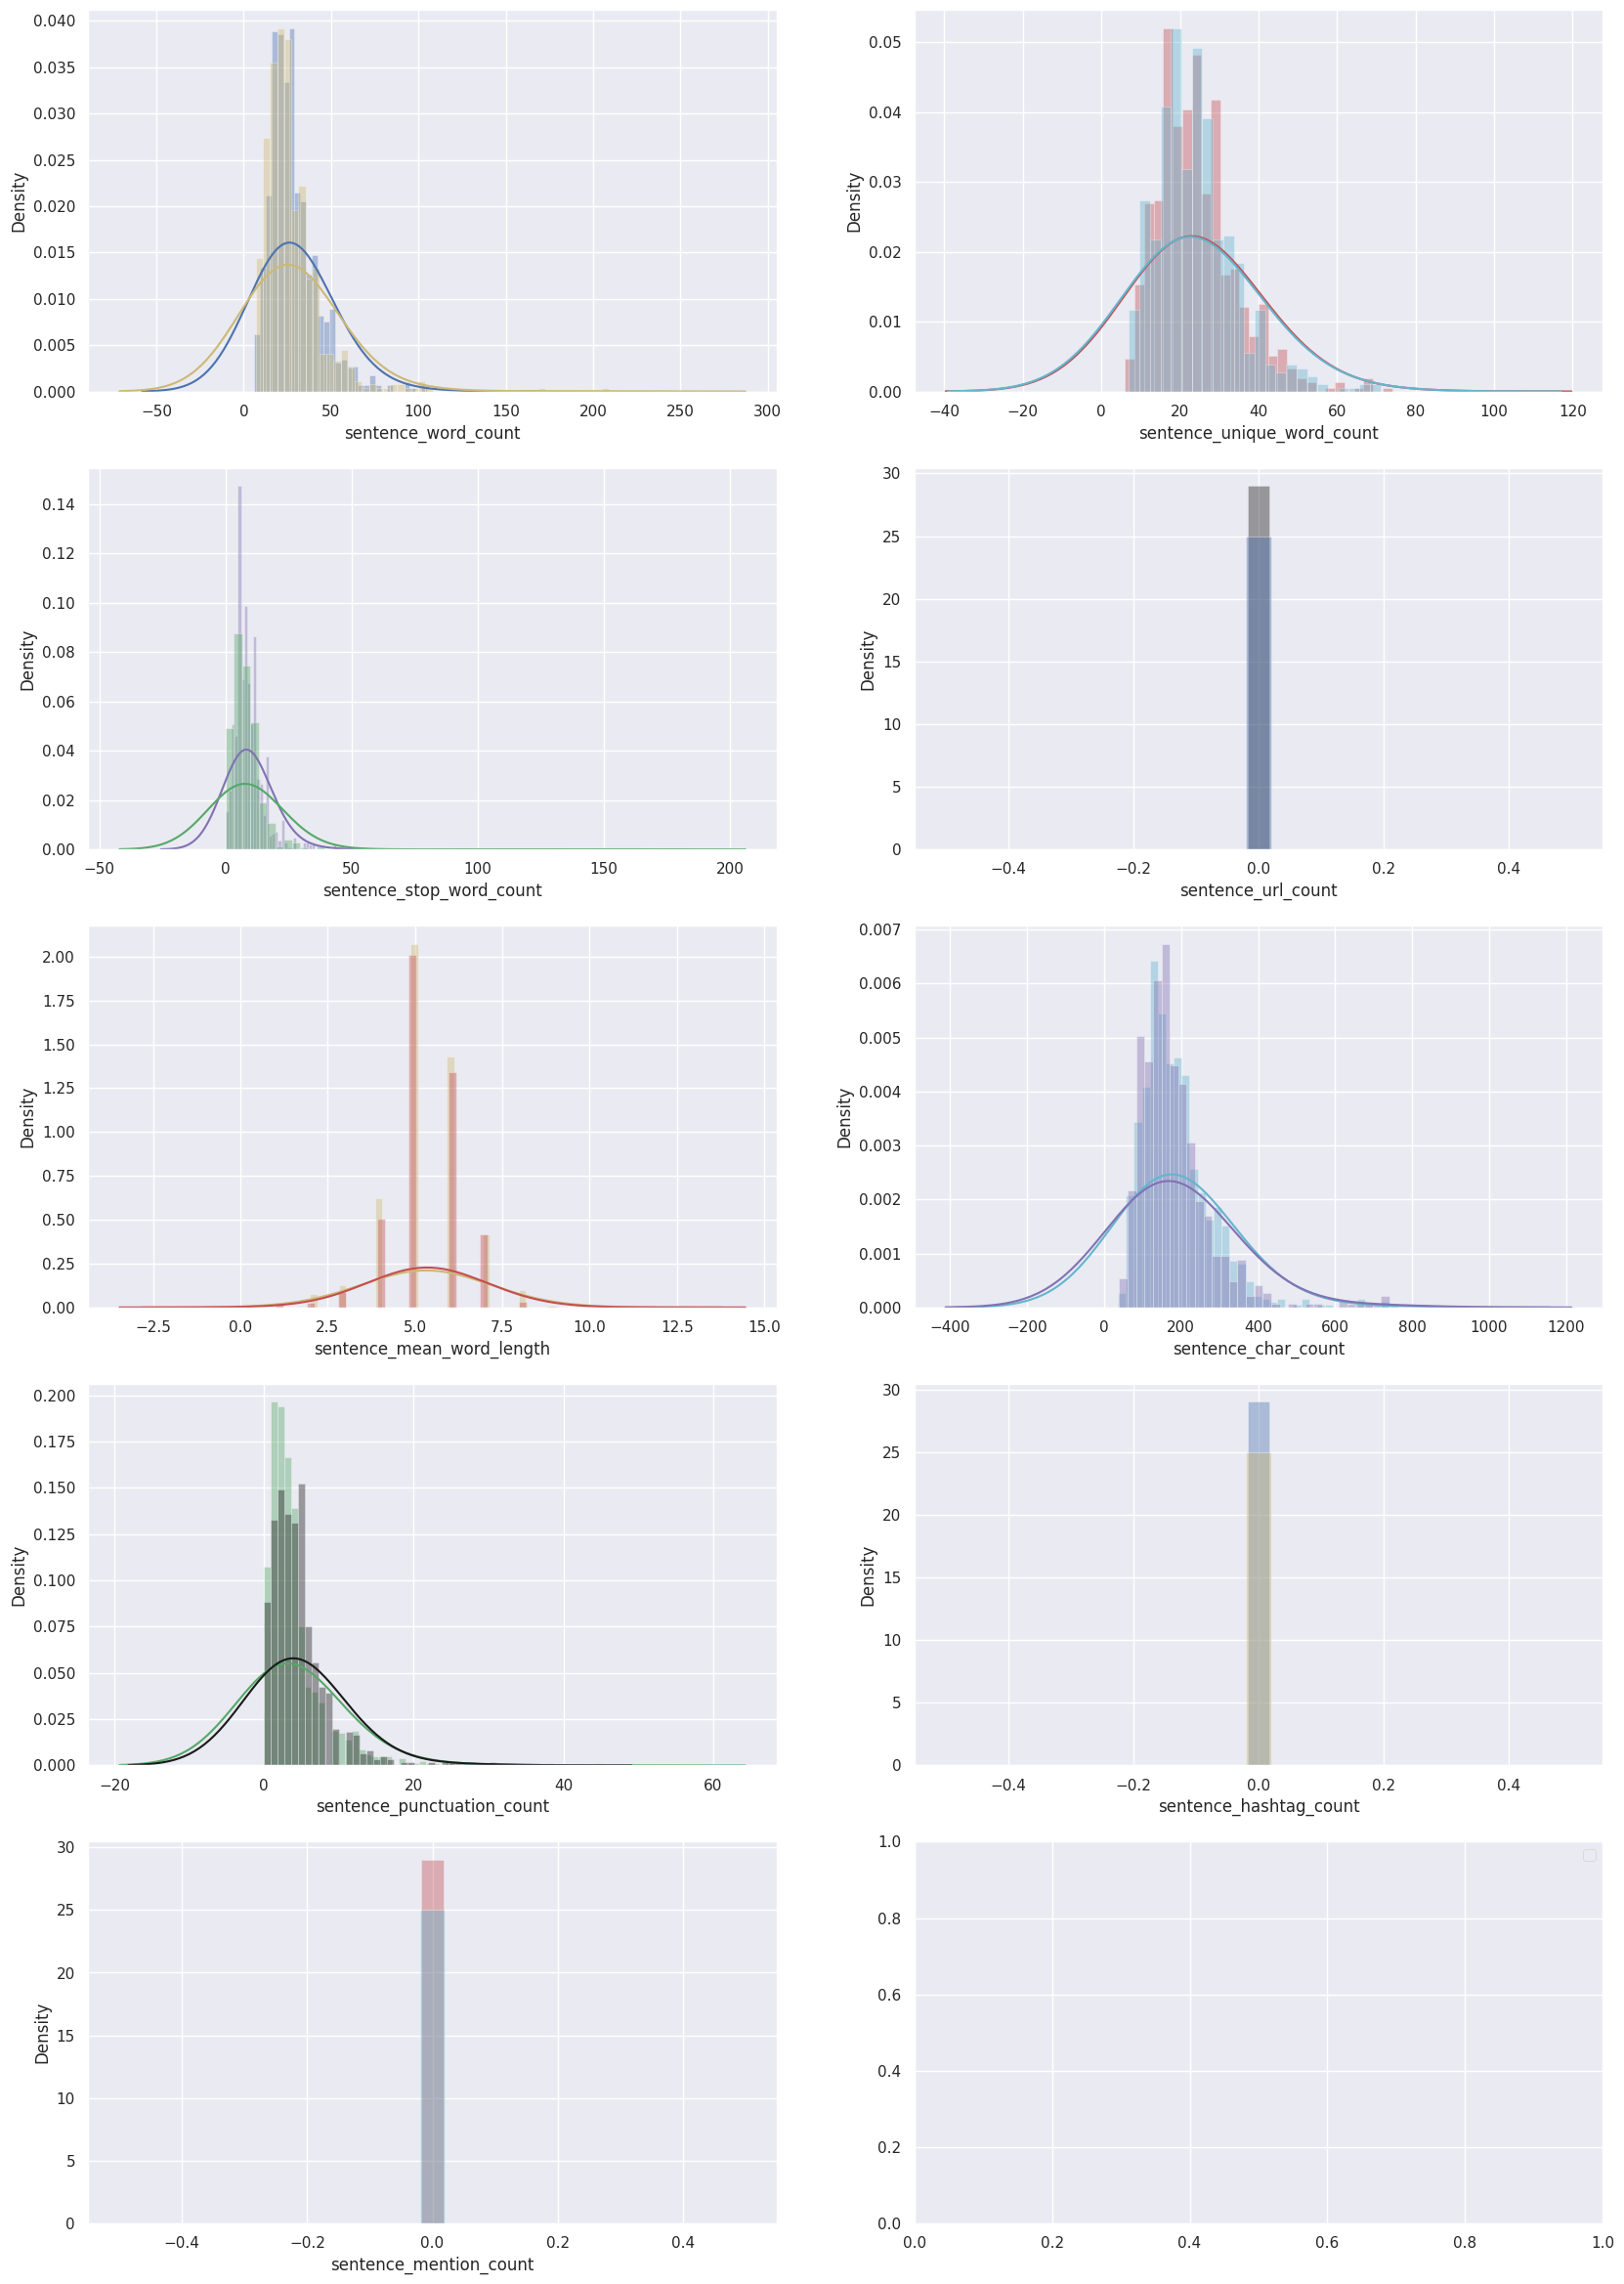

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for sentence column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds
Train data Text cleaning completed. Time taken = 7 seconds

For target = relation

    For class = causes
Top 200 n-grams
: ['cause', 'patient', 'treatment', 'disease', 'may', 'pain', 'infection', 'syndrome', 'symptom', 'present', 'case', 'not', 'which', 'hypertension', 'result', 'include', 'b', 'type', 'use', 'severe', 'virus', 'occur', 'chronic', 'associate', 'who', 'characterize', 'risk', 'drug', 'fever', 'but', 'during', 'also', 'diagnosis', 'see', 'develop', 'high', 'seizure', 'disorder', 'acute', 'cell', 'increase', 'report', 'c', 'do', 'study', 'clinical', 'common', 'skin', 'pregnancy', 'carcinoma', 'headache', 'often', 'bone', 'usually', 

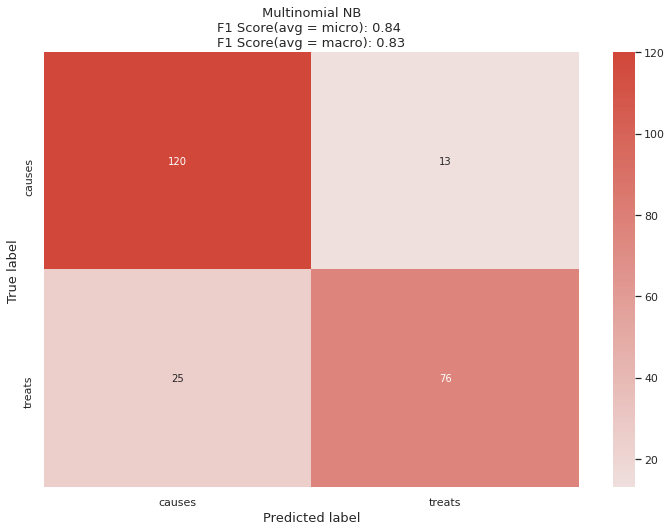

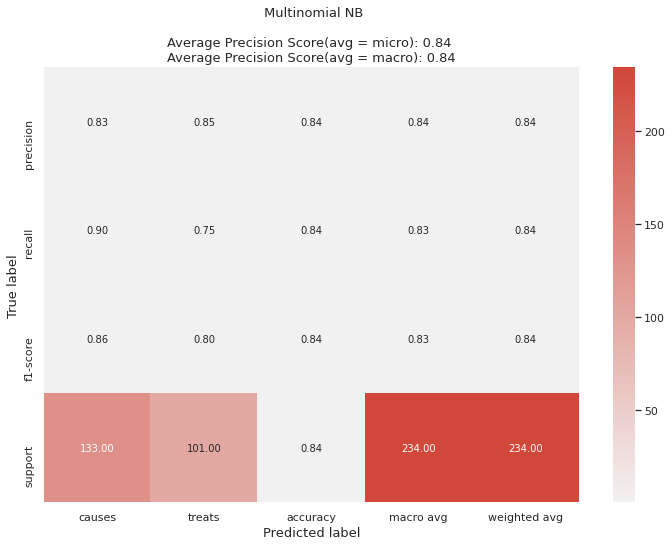

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
Training completed. Time taken for Auto_NLP = 0.5 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [58]:
# Treinamento do modelo
train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(nlp_column, 
                                                          train, 
                                                          val, 
                                                          target, 
                                                          score_type='balanced_accuracy',
                                                          modeltype='Classification',
                                                          top_num_features=200, 
                                                          verbose=3,
                                                          build_model=True)

In [59]:
# Estrutura do modelo criado
nlp_pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function Auto_NLP.<locals>.<lambda> at 0x7fef12f59a70>)),
                ('tfidfvectorizer',
                 TfidfVectorizer(encoding='latin-1', max_df=0.35491121674007997,
                                 min_df=2, ngram_range=(1, 3),
                                 sublinear_tf=True, token_pattern='\\w{1,}')),
                ('selectkbest',
                 SelectKBest(k=3366,
                             score_func=<function chi2 at 0x7fef1ccf34d0>)),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=MultinomialNB(alpha=0.5891293453635583),
                                        cv=3, method='isotonic'))])

# Parte 5. Realizando previsões

In [62]:
test['relation_pred'] = nlp_pipeline.predict(test[nlp_column])

    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds


In [74]:
# Selecionando os registros com erro na previsao
erro = test[test['relation'] != test['relation_pred']]

# Exibindo os registros
print('Total em teste: ',test.shape[0])
print('Erros: ',erro.shape[0])
erro.head()

Total em teste:  533
Erros:  87


,relation,sentence,relation_pred
42,causes,"With successful treatment of the patient's depression with IMIPRAMINE the tremors disappeared, but slowly began again after drug noncompliance resulted in recurrence of DEPRESSION.",treats
56,causes,"The therapeutic results of Lp TAE (transcatheter arterial embolization in the presence or absence of Gelfoam particles preceded by the infusion of a mixture of lipiodol and an anticancer drug via the proper hepatic artery) or DSM TAE (transcatheter arterial embolization with degradable starch microspheres and the arterial injection of anticancer drugs via the hepatic artery) combined with HYPERTHERMIA were evaluated in 30 patients with HEPATOCELLULAR CARCINOMA (HCC), 5 subjects with hepatic cholangiocarcinoma, and 22 patients with metastatic liver carcinoma.",treats
385,treats,The most significant results of this study are the level of hydration of the PC headgroup and the lack of DEHYDRATION with INCREASING TEMPERATURE AND SALT ADDITION.,causes
441,treats,"Human alpha fetoproteins were purified from umbilical cord serum and from ASCITES FLUID of a patient with HEPATOMA by affinity chromatography, and their chemical compositions and terminal sequences were compared.",causes
490,causes,TARDIVE DYSKINESIA (TD) is a common side effect of LONG TERM MEDICATION WITH TYPICAL NEUROLEPTICS.,treats


# Parte 6. Considerações Finais

O modelo AutoNLP foi capaz de acertar aproximadamente 84% dos registros de testes. Não é um resultado excelente mas também não é ruim. Acredito que tem chances de melhorar configurando alguns parametros do AutoNLP


# FIM